In [1]:
import pandas as pd
import seaborn as sns
import random

In [41]:
# 'https://drive.google.com/uc?id=1YjYmulVuJPH0IP770enNPWo9WPHdf1U0'

# article_text = pd.read_csv('./datasets/article_text_data.gz', 
#                            compression='gzip',
#                            index_col='id')

In [45]:
# 'https://drive.google.com/uc?id=1_osI1ZMtR3chrKtwRfwlNyrr5VP0OIT0'

article_data = pd.read_csv('./datasets/article_about_data.gz',
                           compression='gzip',
                           parse_dates=['datetime'],
                           index_col='id')

In [40]:
article_data

,datetime,tags,article_lenght,rate,views,bookmarks,comments,header
id,,,,,,,,
1,2006-07-13 14:23:39,"['хабрахаб','wiki','faq','чаво','механизм','дв...",428.0,1,36000,10,67,Wiki-FAQ для Хабрахабра
2,2006-07-13 20:45:38,"['ошибки','баги','bugs','error','warning','habr']",216.0,0,18000,1,37,Мы знаем много недоделок на сайте… но!
4,2006-07-14 13:59:37,"['google','маслов','сокур и партнеры','pr','со...",258.0,1,4000,1,15,"Маслов, Сокур и партнеры пиарят Google в России"
6,2006-07-14 17:19:18,"['хабрахабр','подкасты','mp3','контент','текст...",362.0,0,4500,1,35,Подкасты на Хабрахабре
7,2006-07-14 21:48:02,"['логин','login','habr']",190.0,0,3500,1,11,Самопроизвольное разлогинивание
...,...,...,...,...,...,...,...,...
128530,2011-09-15 15:49:53,"['windows 8','разработка под windows']",120.0,63,4800,12,151,Краткий видео-обзор Windows 8
128531,2011-09-15 15:52:15,"['','блог компании google developers']",1147.0,1,1000,0,0,Расширенные возможности интернет-магазина Chro...
128532,2011-09-15 18:42:06,"['социальные сети','образование','обучение онл...",4391.0,20,2000,29,25,Концепция образовательной социальной сети


In [47]:
# Превращаю теги в массив, убираю пустые теги
article_data.tags = [tag for tag in article_data.tags.str.replace(pat="[\[\]']", repl='', regex=True).str.split(',') if tag != '']

# Создаю счетчик тегов
article_data['tags_count'] = article_data.tags.apply(len)

In [48]:
article_data

,datetime,tags,article_lenght,rate,views,bookmarks,comments,header,tags_count
id,,,,,,,,,
1,2006-07-13 14:23:39,"[хабрахаб, wiki, faq, чаво, механизм, движок, ...",428.0,1,36000,10,67,Wiki-FAQ для Хабрахабра,7
2,2006-07-13 20:45:38,"[ошибки, баги, bugs, error, warning, habr]",216.0,0,18000,1,37,Мы знаем много недоделок на сайте… но!,6
4,2006-07-14 13:59:37,"[google, маслов, сокур и партнеры, pr, сопрово...",258.0,1,4000,1,15,"Маслов, Сокур и партнеры пиарят Google в России",8
6,2006-07-14 17:19:18,"[хабрахабр, подкасты, mp3, контент, тексты, habr]",362.0,0,4500,1,35,Подкасты на Хабрахабре,6
7,2006-07-14 21:48:02,"[логин, login, habr]",190.0,0,3500,1,11,Самопроизвольное разлогинивание,3
...,...,...,...,...,...,...,...,...,...
128530,2011-09-15 15:49:53,"[windows 8, разработка под windows]",120.0,63,4800,12,151,Краткий видео-обзор Windows 8,2
128531,2011-09-15 15:52:15,"[, блог компании google developers]",1147.0,1,1000,0,0,Расширенные возможности интернет-магазина Chro...,2
128532,2011-09-15 18:42:06,"[социальные сети, образование, обучение онлайн...",4391.0,20,2000,29,25,Концепция образовательной социальной сети,4


In [49]:
article_data.describe()

,article_lenght,rate,views,bookmarks,comments,tags_count
count,79526.000000,80134.000000,80134.000000,80134.000000,80134.000000,80134.000000
mean,2985.578968,18.251716,4586.218122,28.410413,39.601393,5.029251
std,3959.850657,30.935018,9546.539336,96.274423,58.963285,2.377734
min,1.000000,-128.000000,32.000000,0.000000,0.000000,2.000000
25%,672.000000,2.000000,354.000000,1.000000,7.000000,4.000000
50%,1529.000000,12.000000,824.000000,4.000000,20.000000,5.000000
75%,3753.000000,31.000000,3500.000000,19.000000,50.000000,6.000000
max,77522.000000,127.000000,65464.000000,6474.000000,2266.000000,61.000000


<AxesSubplot: xlabel='tags_count'>

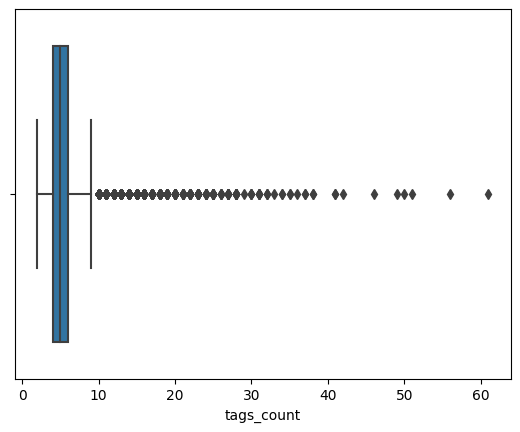

In [50]:
# Среднее количество тегов в статье 6, но есть исключения...

sns.boxplot(data=article_data, x='tags_count')

In [51]:
# ... разные теги имеют одно значение:
# 
# [lor, linux.org.ru]
# [fidonet, фидонет, фидо]
# [хак, хакеры, хакинг]

article_data.query('tags_count > 10')

,datetime,tags,article_lenght,rate,views,bookmarks,comments,header,tags_count
id,,,,,,,,,
787,2006-12-02 18:35:55,"[sex.ru, секс.ру, секс, sex, adult, рбк, финам...",657.0,1,779,2,27,Тема секса в рунете: уж полночь близится…,12
4225,2006-07-31 13:55:31,"[сми, журналистика, контент, cnn, люди, тв, yo...",2387.0,0,260,1,0,Телекомпания CNN создала сайт для частных инфо...,11
4282,2006-08-15 09:48:31,"[инновации, r, d, google, apple, samsung, yaho...",4238.0,0,345,0,0,Google возглавила список инновационных компаний,12
4493,2006-10-09 08:35:00,"[youtube, google, techcrunch, слухи, m, a, вид...",2360.0,0,264,0,5,"Google хочет заплатить $1,6 млрд за YouTube",11
4616,2006-10-30 12:34:00,"[google, ии, ai, r, d, выдача, спам, поисковый...",3737.0,-1,479,6,22,Стали известны секретные планы Google на 2006 год,11
...,...,...,...,...,...,...,...,...,...
128405,2011-09-14 07:19:57,"[freeradius, freeradius2, wpa, wpa2, ieee 802....",6316.0,4,24000,33,0,FreeRADIUS for WPA & WPA2 Enterprise: Windows ...,14
128408,2011-09-14 05:57:40,"[skype, телефон, онлайн консультант, техподдер...",3799.0,-4,2400,3,13,Консультирование и техподдержка,12
128427,2011-09-14 08:00:00,"[экстремальный аджайл, agile, аджайл, гибкие м...",15626.0,77,28000,112,41,Как перестать беспокоиться и начать работать?,11


In [ ]:
# ! Нужно найти групповые теги и объединить их.
# Возможно такие теги чаще используются вместе, чем по отдельности.

In [52]:
tags = article_data['tags'].explode('tags') \
                 .reset_index() \
                 .groupby('tags', as_index=False) \
                 .agg({'index': 'count'}) \
                 .rename(columns={'tags': 'tag', 'index': 'use_count'}) \
                 .sort_values('use_count')

In [53]:
tags

,tag,use_count
33613,upload images,1
40654,бруазер,1
40655,брукл,1
40656,бруклин,1
40657,брукс,1
...,...,...
20270,microsoft,2366
12836,google,3709
71648,я пиарюсь,3921
16615,it-компании,4565


In [54]:
tags.groupby('use_count').agg({'tag': 'count'})

,tag
use_count,
1,46257
2,9696
3,4194
4,2510
5,1555
...,...
2366,1
3709,1
3921,1


<AxesSubplot: xlabel='use_count', ylabel='count'>

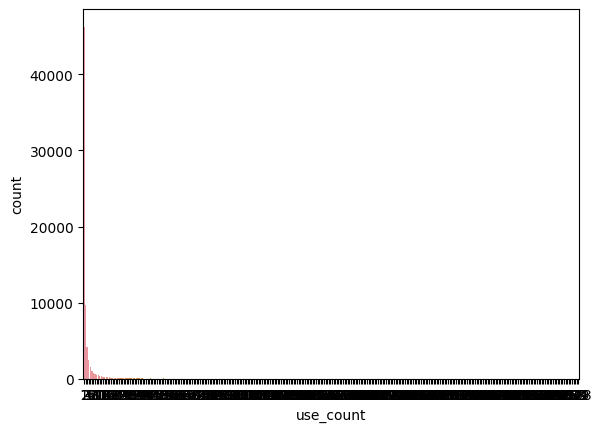

In [55]:
sns.countplot(data=tags.query('use_count < 1000'), x='use_count')

In [ ]:
# Рассчитываю параметры для тегов
tags = article_data.explode('tags') \
         .groupby('tags', as_index=False) \
         .agg({'id'      : 'count',
               'date'    : list,
               'rate'    : 'mean',
               'view'    : 'mean',
               'bookmark': 'mean',
               'comment' : 'mean'}) \
         .rename(columns={'tags'    : 'tag',
                           'id'      : 'count',
                           'date'    : 'dates',
                           'rate'    : 'mean_rate',
                           'view'    : 'mean_views',
                           'bookmark': 'mean_bookmarks',
                           'comment' : 'mean_comments'}) \
         .sort_values('count')

In [ ]:
# Некоторые теги встречаются очень редко, другие же - в каждой второй статье.

tags

In [ ]:
# Статей, где используется только один тег, нет.
# Можно удалить теги, которые встречаются только один раз,
# информации мы не потеряем.

article_data.query('tags_count == 1')

In [ ]:
tags = tags.query('count > 1 and tag != "чулан"')

In [ ]:
from collections import Counter
import itertools

tags_counter = Counter()
tags_counter.setdefault(0)

for elm in article_data.itertuples():    
    for tags_combination in itertools.combinations(iterable=elm.tags, r=2):
        tags_counter[tags_combination] += 1

tags_pair = pd.DataFrame.from_dict(tags_counter, orient='index') \
                        .reset_index() \
                        .rename(columns={'index': 'tags_pair', 0: 'count'}) \
                        .query('tags_pair != 0') \
                        .sort_values('count', ascending=False)

In [ ]:
tags_pair